In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Getting to know a dataset

## Initial Exploration

Let's say we've got a new dataset about books. Is this good data? What questions can it answer for us? It's only after we understand what our data contains that we can think about how the data might be useful to us. Exploratory Data Analysis, or EDA for short, is the process of 
- cleaning and reviewing data to derive insights such as
    - descriptive statistics
    - correlation
    - generate hypotheses for experiments.

EDA results often inform the next steps for the dataset, whether that be generating hypotheses, preparing the data for use in a machine learning model, or even throwing the data out and gathering new data!

Read data with `pandas` and `print` first few raw of that datafram.

In [2]:
df = pd.read_csv("dataset/clean_unemployment.csv")
print(df.head())

  country_code          country_name      continent  ...   2019   2020   2021
0          AFG           Afghanistan           Asia  ...  11.22  11.71  13.28
1          AGO                Angola         Africa  ...   7.42   8.33   8.53
2          ALB               Albania         Europe  ...  11.47  13.33  11.82
3          ARE  United Arab Emirates           Asia  ...   2.23   3.19   3.36
4          ARG             Argentina  South America  ...   9.84  11.46  10.90

[5 rows x 15 columns]


pandas also offers a quick way to summarize the number of missing values in each column, the data type of each column, and memory usage using the `.info` method.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


 It looks like there are no missing values in our dataset, but it does have a two types of data types.

A common question about categorical columns in a dataset is how many data points we have in each category. For example, perhaps we're interested in the continent represented in our `unemployment` data. We can select the `continent` column and use the pandas Series method `.value_counts` to find the number of continent.

In [4]:
print(df.value_counts("continent"))

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


In [5]:
print(df["continent"].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


Gaining a quick understanding of data included in numerical columns is done with the help of the `DataFrame.describe` method. Calling `.describe` on books, we see that it returns the count, mean, and standard deviation of the values in each numerical column (in this case rating and year), along with the min, max, and quartile values.

In [6]:
print(df.describe())

             2010        2011        2012  ...        2019        2020        2021
count  182.000000  182.000000  182.000000  ...  182.000000  182.000000  182.000000
mean     8.409286    8.315440    8.317967  ...    7.243736    8.420934    8.390879
std      6.248887    6.266795    6.367270  ...    5.696573    6.040915    6.067192
min      0.450000    0.320000    0.480000  ...    0.100000    0.210000    0.260000
25%      4.015000    3.775000    3.742500  ...    3.487500    4.285000    4.335000
50%      6.965000    6.805000    6.690000  ...    5.240000    6.695000    6.425000
75%     10.957500   11.045000   11.285000  ...    9.445000   11.155000   10.840000
max     32.020000   31.380000   31.020000  ...   28.470000   29.220000   33.560000

[8 rows x 12 columns]


### Visualizing numerical data

`Histograms` are a classic way to look at the **distribution of numerical data** by splitting numerical values into discrete bins and visualizing the count of values in each bin. Throughout this course, we'll use `Seaborn` to explore datasets visually. Seaborn is imported as s-n-s. We'll also `import matplotlib.pyplot` aliased as plt. To create a histogram, we'll use `sns.histplot` and pass the books DataFrame as the data argument. Next, we indicate which column we'd like to use as x by passing the column name `2011` to the x keyword argument. After running plt.show to display the plot. 

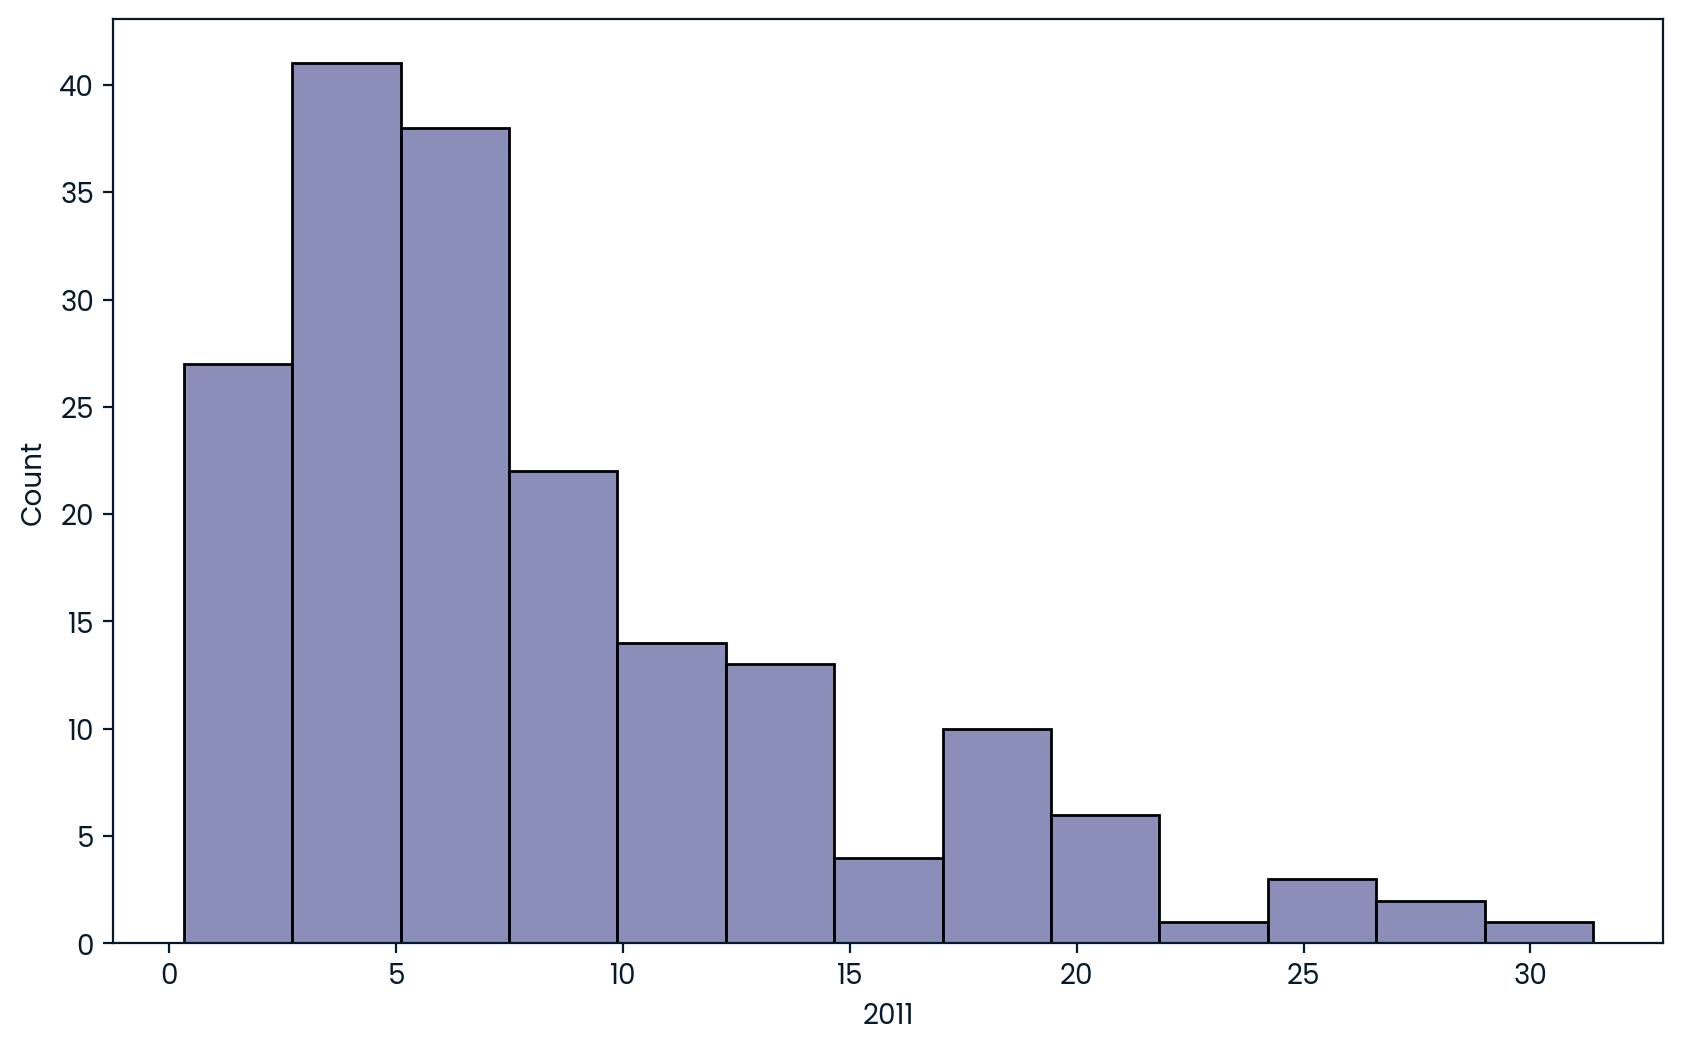

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(x="2011", data=df)
plt.show()

Here we show that most is from `2.5%` to `7.5%`

### Binwidth

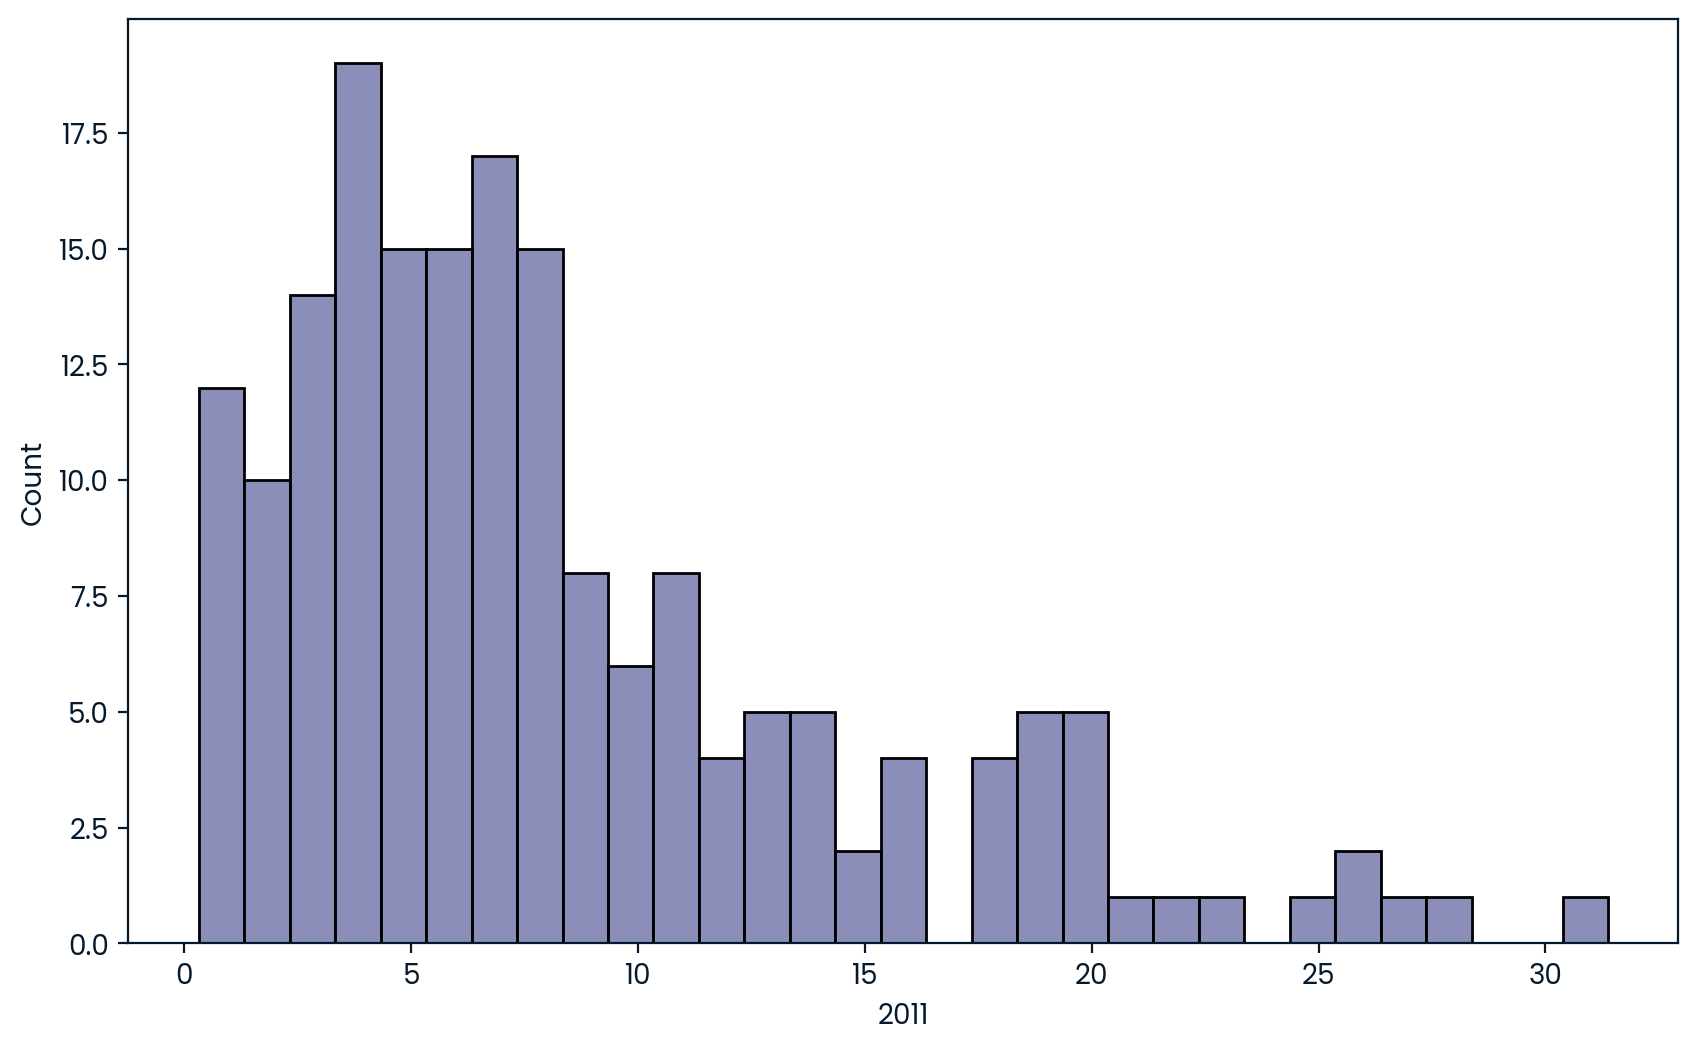

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(x = '2011', data = df, binwidth = 1)
plt.show()

# how to determine `binwidth` so that the x-tick is not middle of the bar.

## Data Validation

Data validation is an important early step in EDA. We want to understand whether data types and ranges are as expected before we progress too far in our analysis!

We learned in the last lesson that dot-info gives a quick overview of data types included in a dataset along with other information such as the number of non-missing values. We can also use the DataFrame `dot-dtypes` attribute if we're only interested in data types.

In [9]:
df.dtypes

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

If a column like `2019` has the data type `object` then we have to change this datatype as `float` by the following way.

In [10]:
df["2019"] = df["2019"].astype(float)

We can validate categorical data by comparing values in a column to a list of expected values using dot-isin, which can either be applied to a Series as we'll show here or to an entire DataFrame.

Let's check whether the values in the genre column are limited to "Africa", "Asia" and "Europe" by passing these genres as a list of strings to dot-isin. The function returns a Series of the same size and shape as the original but with True and False in place of all values, depending on whether the value from the original Series was included in the list passed to dot-isin. We can see that some values are False.

In [11]:
continent_isin_list = df["continent"].isin(["Asia", "Europe", "Africa"])
print(continent_isin_list)

0       True
1       True
2       True
3       True
4      False
       ...  
177    False
178     True
179     True
180     True
181     True
Name: continent, Length: 182, dtype: bool


And if we're interested in filtering the DataFrame for only values that are in our list, we can use the isin code we just wrote to filter using Boolean indexing.

In [12]:
print(df[continent_isin_list].head())

  country_code          country_name continent  ...   2019   2020   2021
0          AFG           Afghanistan      Asia  ...  11.22  11.71  13.28
1          AGO                Angola    Africa  ...   7.42   8.33   8.53
2          ALB               Albania    Europe  ...  11.47  13.33  11.82
3          ARE  United Arab Emirates      Asia  ...   2.23   3.19   3.36
5          ARM               Armenia      Asia  ...  18.30  21.21  20.90

[5 rows x 15 columns]


We can also use the tilde operator at the beginning of the code block to invert the True/ False values so that the function returns True if the value is NOT in the list passed to dot-isin.

In [13]:
continent_isin_not_list = ~df["continent"].isin(["Asia", "Europe", "Africa"])
print(continent_isin_not_list)

0      False
1      False
2      False
3      False
4       True
       ...  
177     True
178    False
179    False
180    False
181    False
Name: continent, Length: 182, dtype: bool


In [14]:
print(df[continent_isin_not_list]["continent"].unique())

['South America' 'Oceania' 'North America' nan]


Let's now validate numerical data. We can select and view only the numerical columns in a DataFrame by calling the `select_dtypes` method and passing `"number"` as the argument.

In [15]:
print(df.select_dtypes("number").head())

    2010   2011   2012   2013   2014  ...   2017   2018   2019   2020   2021
0  11.35  11.05  11.34  11.19  11.14  ...  11.18  11.15  11.22  11.71  13.28
1   9.43   7.36   7.35   7.37   7.37  ...   7.41   7.42   7.42   8.33   8.53
2  14.09  13.48  13.38  15.87  18.05  ...  13.62  12.30  11.47  13.33  11.82
3   2.48   2.30   2.18   2.04   1.91  ...   2.46   2.35   2.23   3.19   3.36
4   7.71   7.18   7.22   7.10   7.27  ...   8.35   9.22   9.84  11.46  10.90

[5 rows x 12 columns]


Perhaps we'd like to know the range of unemployment rate in a column of `df`. We can check the lowest and highest rate by using the dot-min and dot-max functions, respectively. And we can view a more detailed picture of the distribution of year data using Seaborn's boxplot function.

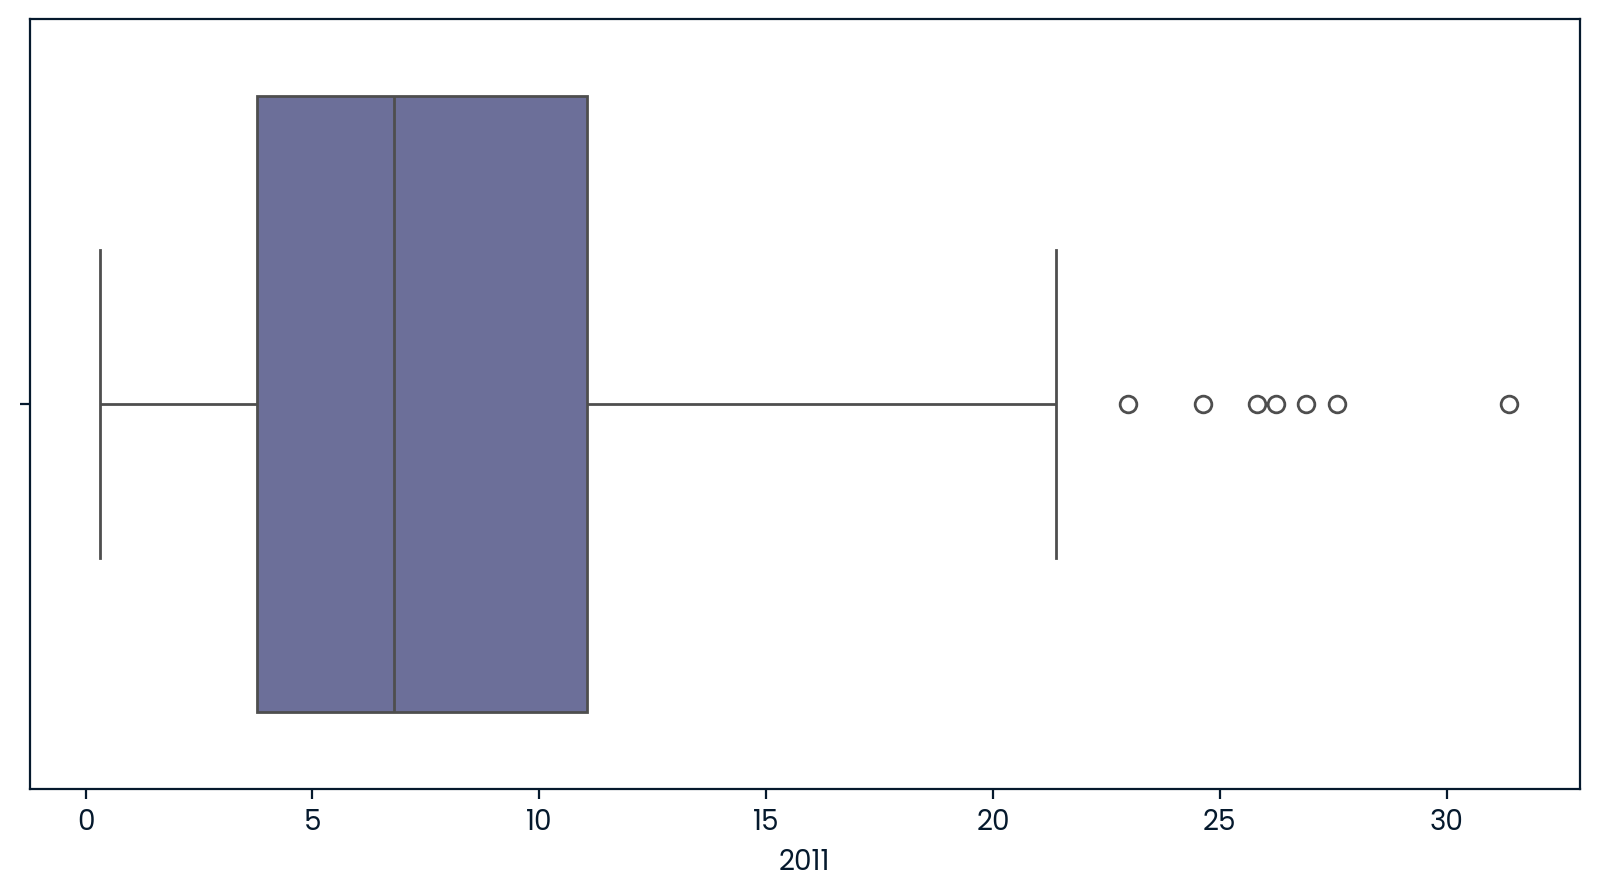

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "2011",data = df)
plt.show()

The `boxplot` shows the boundaries of each quartile of year data: as we saw using min and max, the lowest rate is near 0% and the highest year is above 30%. The 25th and 75th percentiles are below 4-5% and 10-11% and the median is 6.5%.

We can also view the year data grouped by a categorical variable.

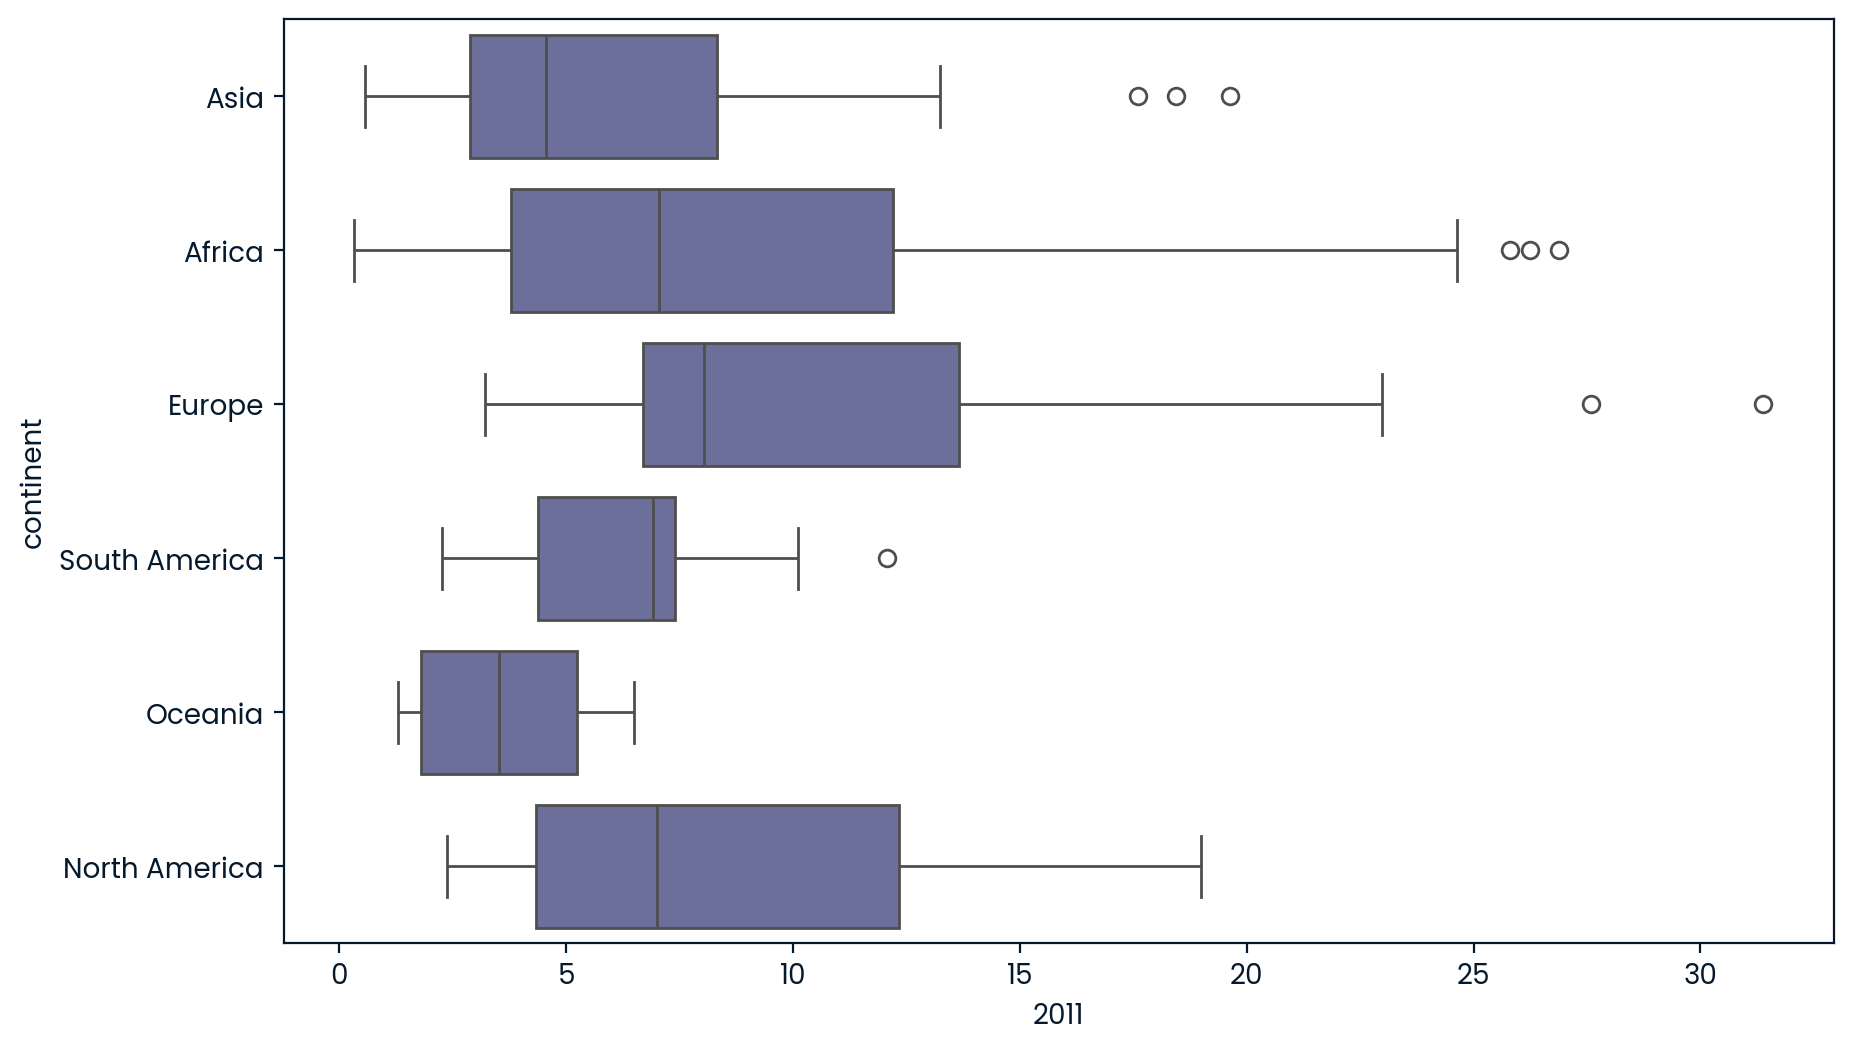

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "2011", y = "continent", data = df)
plt.show()

### Detect how the unemployment rate varied by year for each continent

To detect how the unemployment rate varied by year for each continent, we need to:

- Melt the data to long format (with year and rate columns).
- Plot a boxplot to show the distribution of unemployment rates per continent over the years.

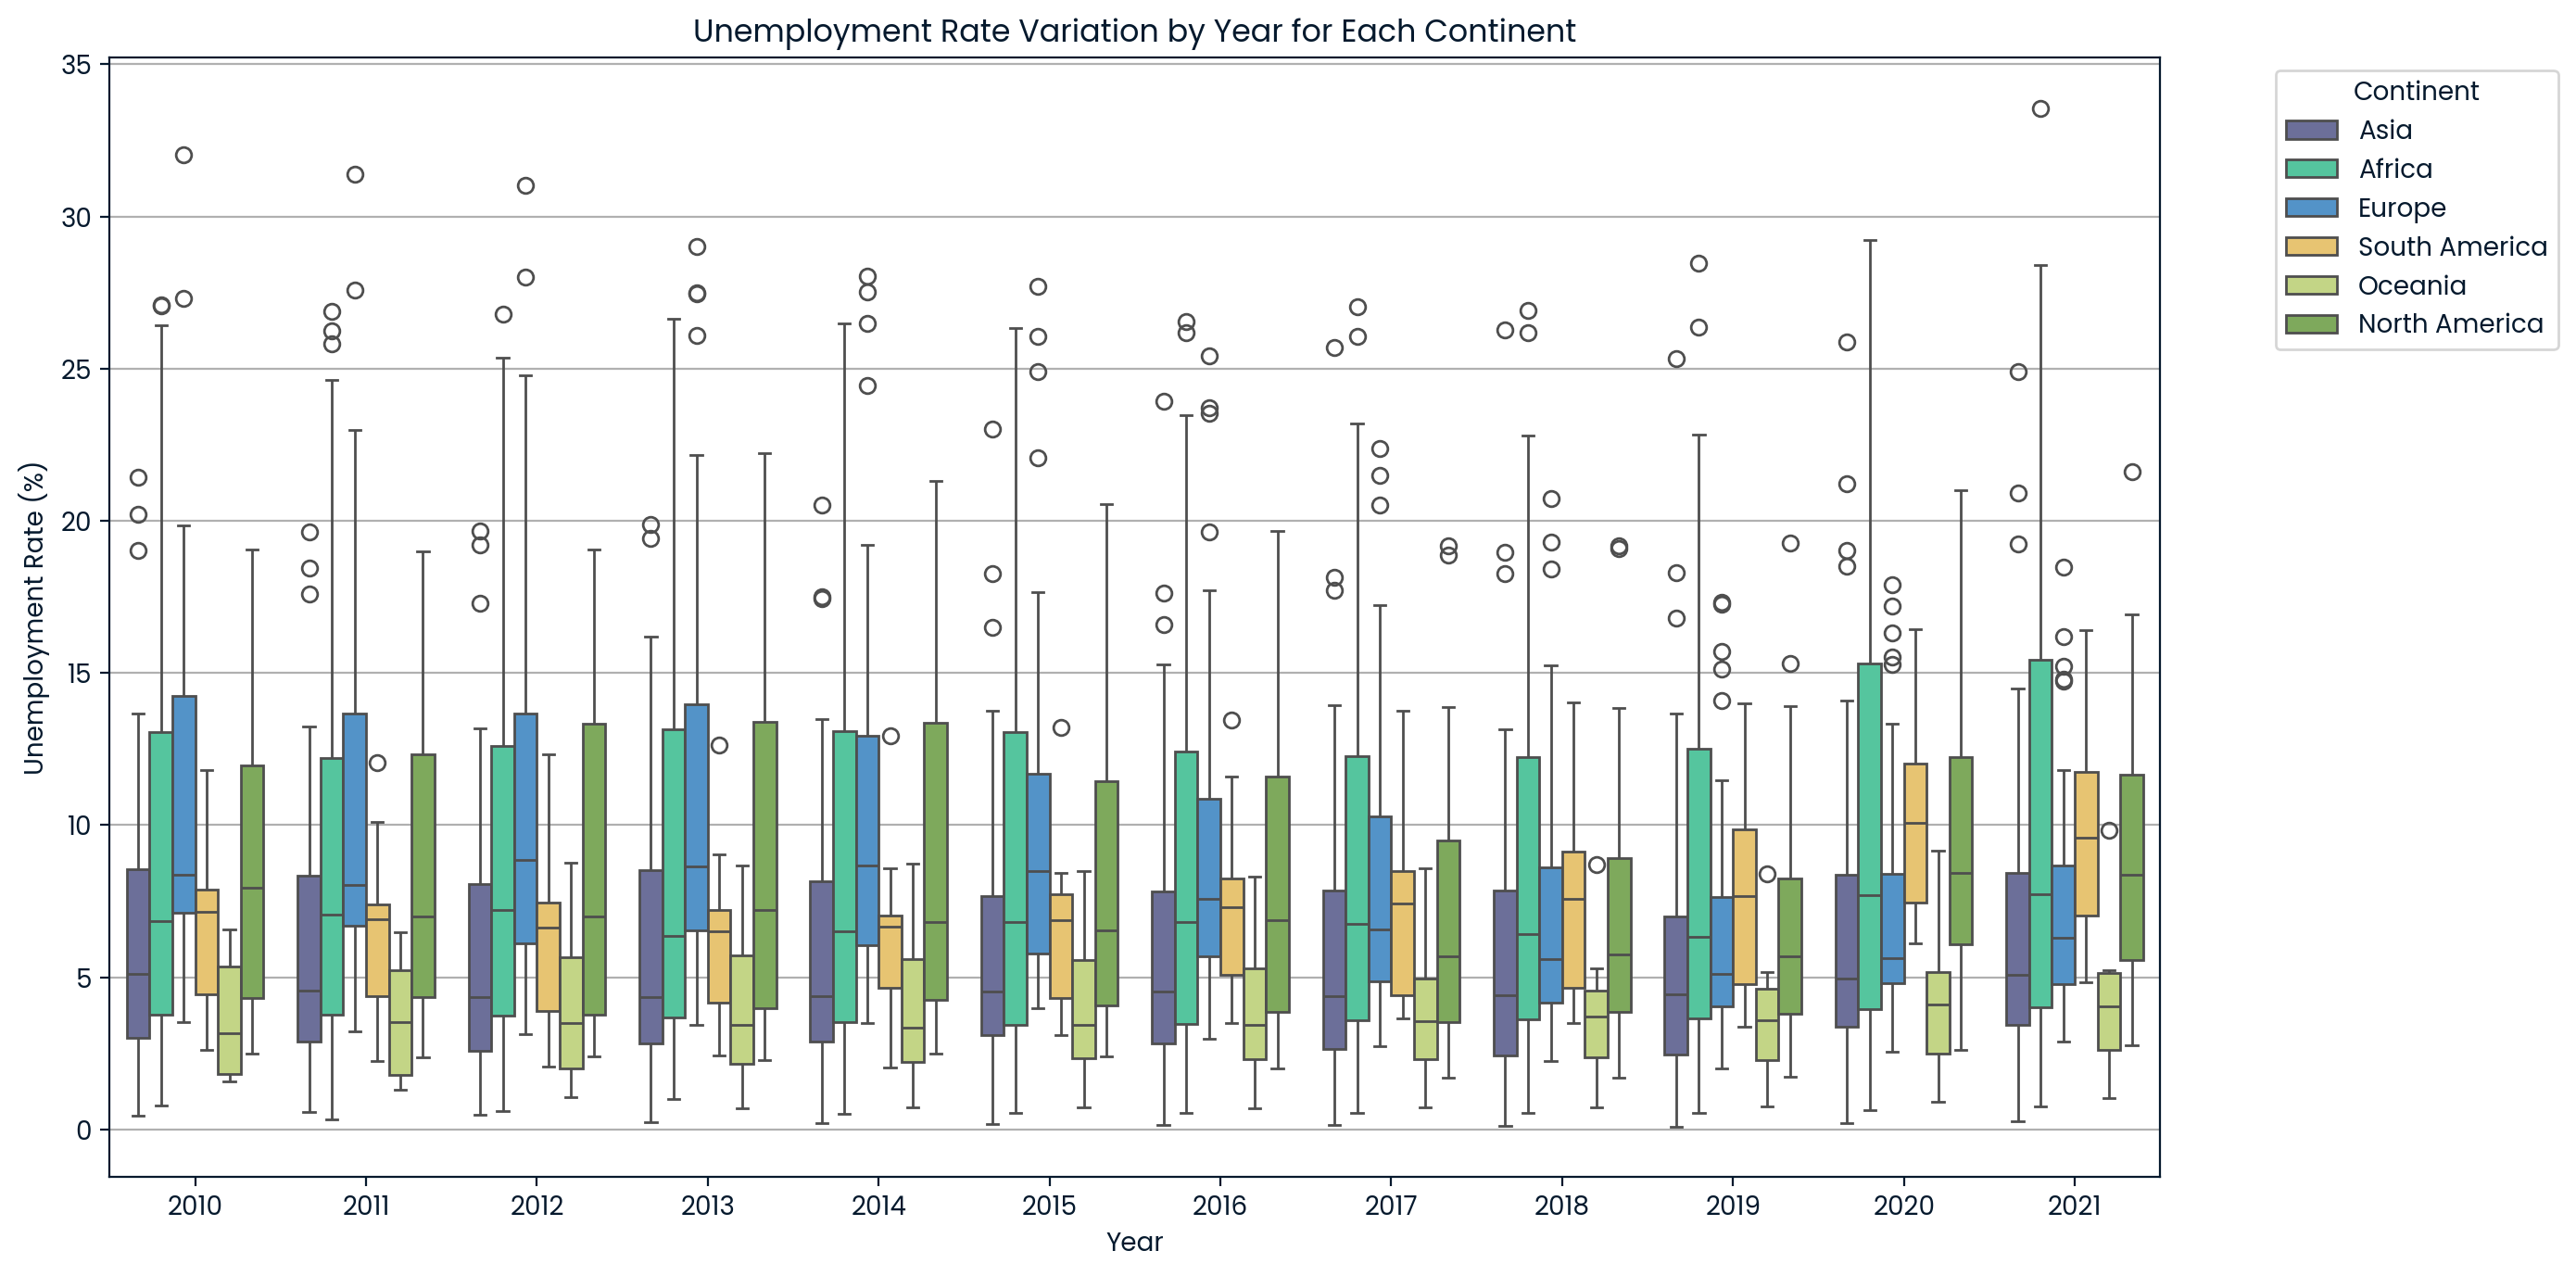

In [18]:
# Melt the data to long format
df_melted = df.melt(id_vars=["country_name", "continent"], 
                    value_vars=[str(year) for year in range(2010, 2022)],
                    var_name="year", value_name="unemployment_rate")

# Set the figure size and style
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_melted, x="year", y="unemployment_rate", hue="continent")

# Customize the plot
plt.title("Unemployment Rate Variation by Year for Each Continent")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y')

plt.show()

[Know About Malt](https://github.com/TasneemWorld/DataCamp/blob/main/Associate%20Data%20Scientist/EDA/Know%20about%20Malt.pdf)

This plot is too massy to interpret.this can be solved by three ways

### Option - 1 Faceted Boxplots by Continent -
- Create a separate subplot (facet) for each continent.
- Each plot shows how unemployment changed from 2010 to 2021 for that continent.

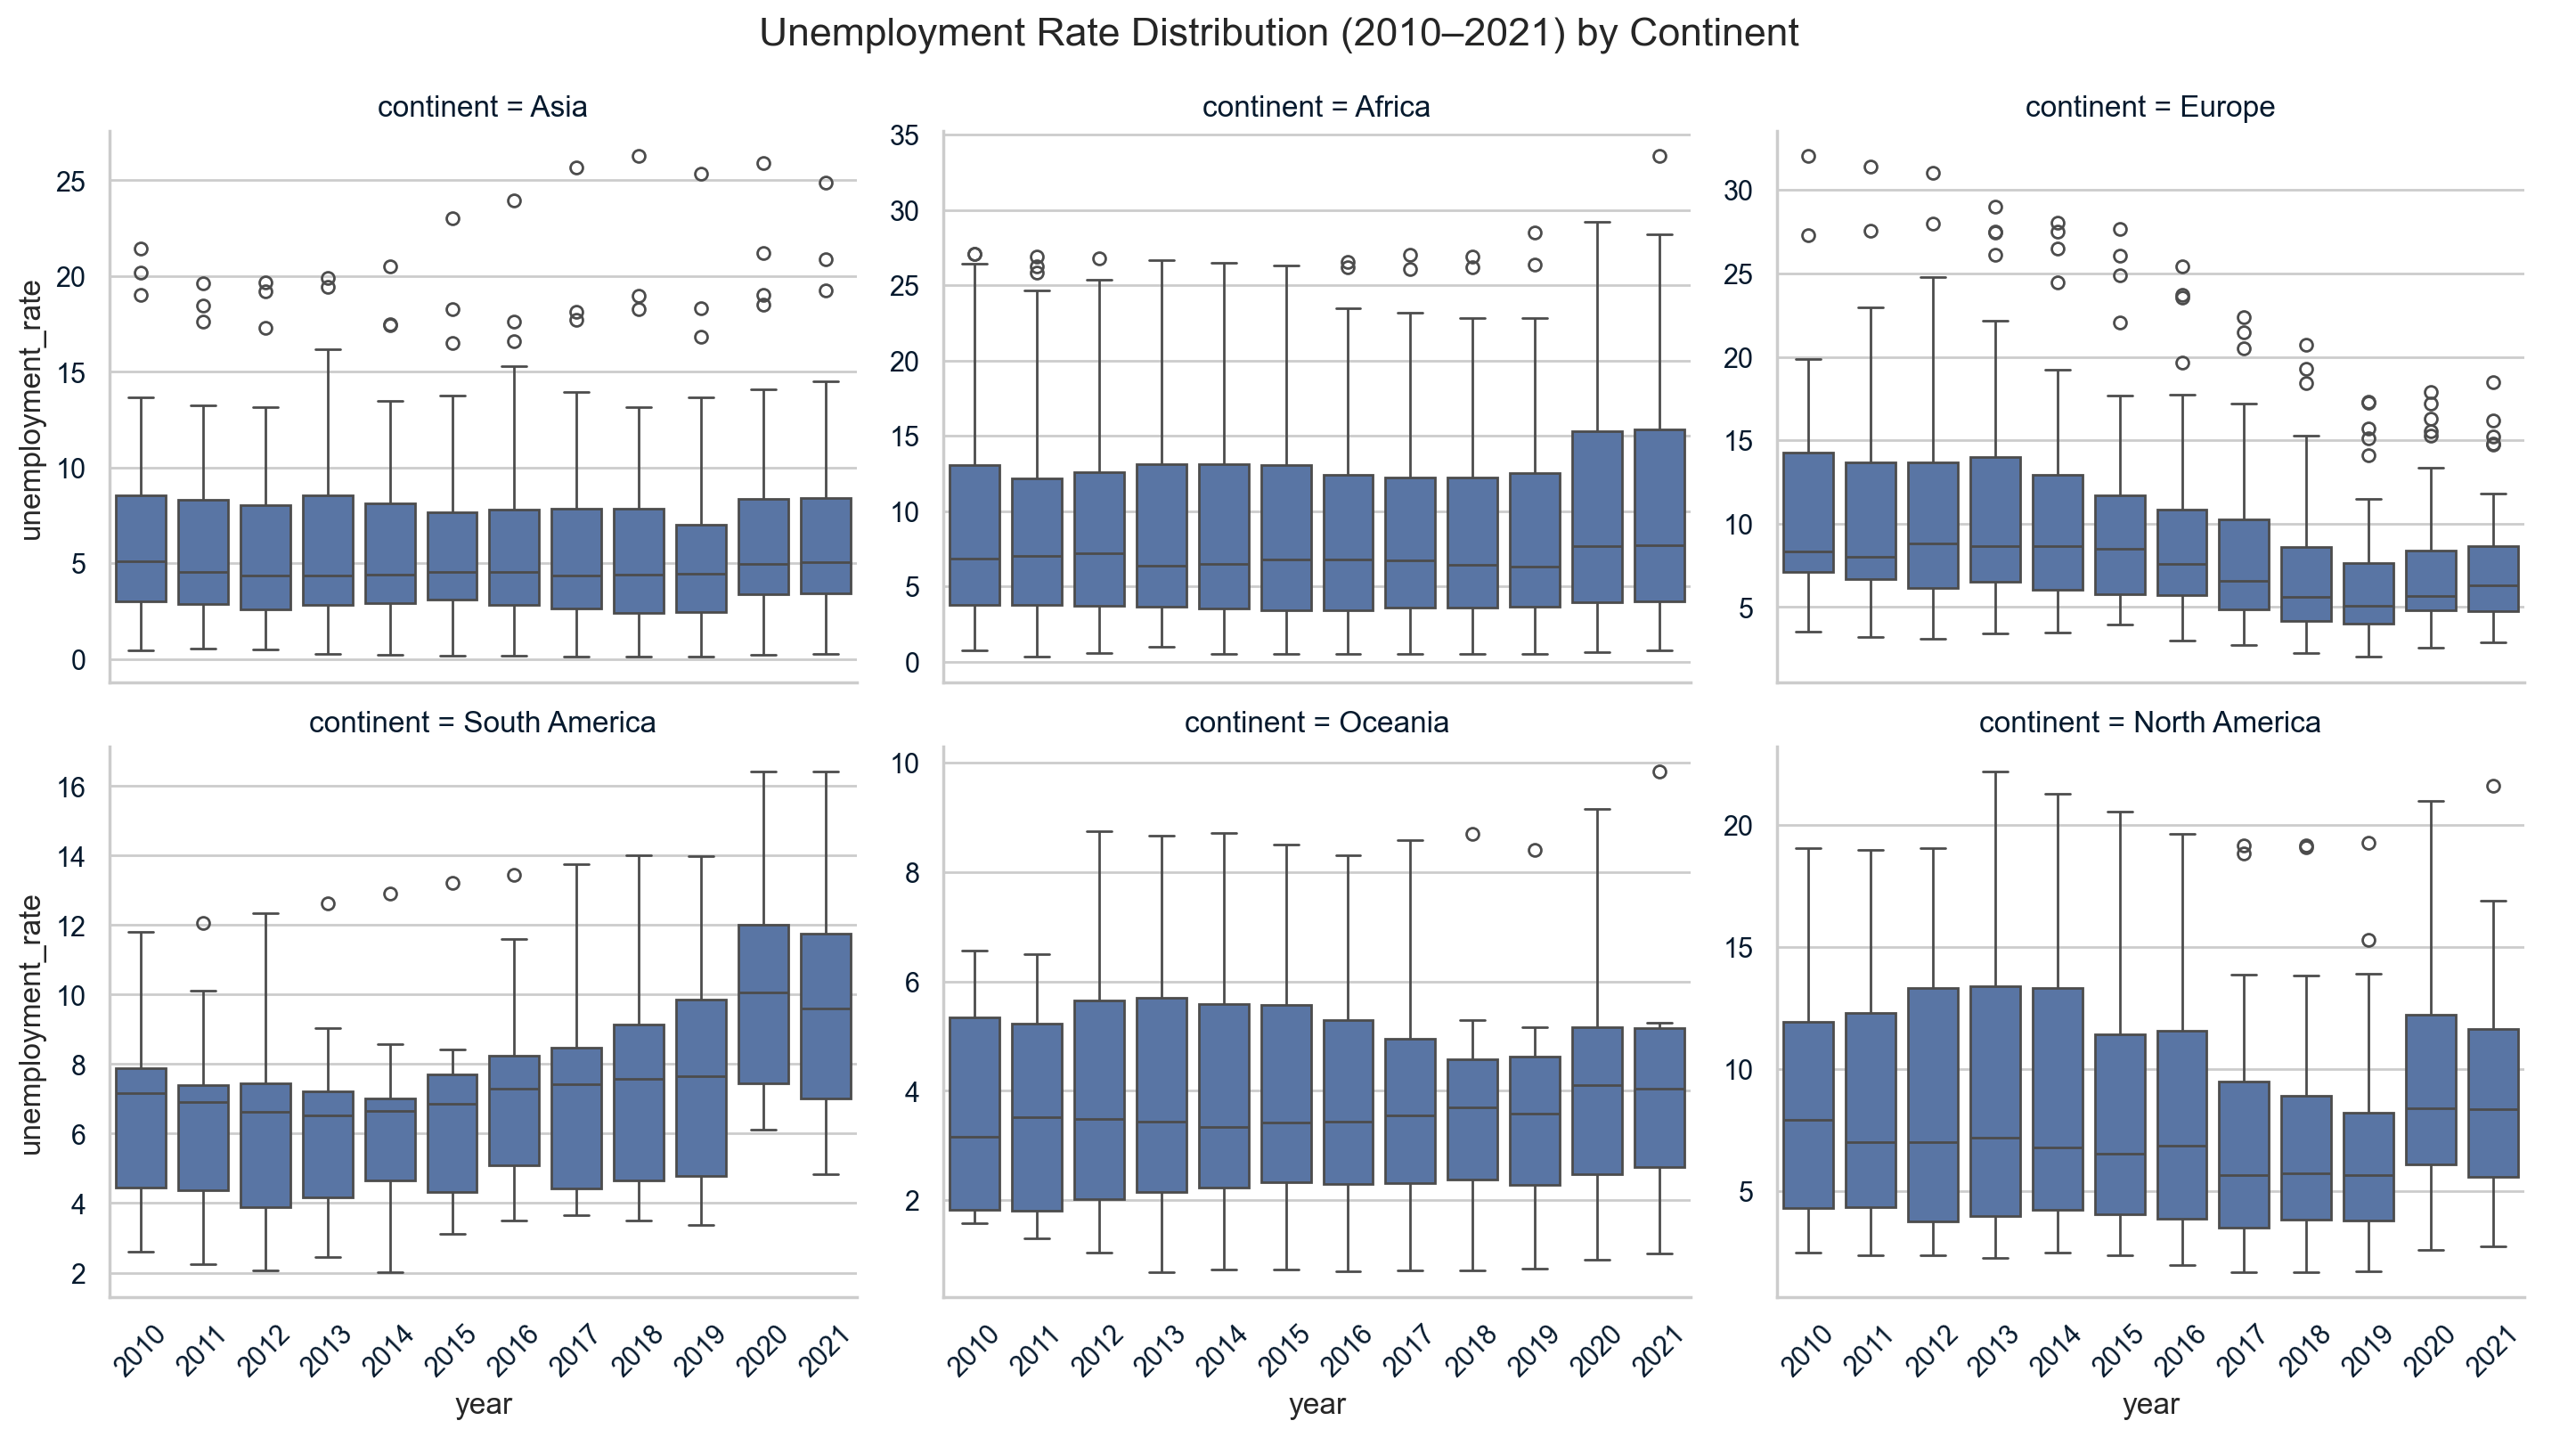

In [19]:
# Set the seaborn theme
sns.set(style="whitegrid")

# Create a FacetGrid of boxplots by continent
g = sns.catplot(
    data=df_melted,
    x="year",
    y="unemployment_rate",
    col="continent",
    kind="box",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=False  # Allow different y-axis ranges per continent
)

# Rotate x-tick labels for better readability
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

# Set a main title and tidy layout
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Unemployment Rate Distribution (2010–2021) by Continent", fontsize=16)

plt.show()

[Want to know catplot](https://github.com/TasneemWorld/DataCamp/blob/main/Associate%20Data%20Scientist/EDA/Want's%20to%20know%20Catplot.pdf)

### Option 2: Line Plot of Median Unemployment Rate by Continent
- Show a line for each continent showing the median unemployment rate over the years.

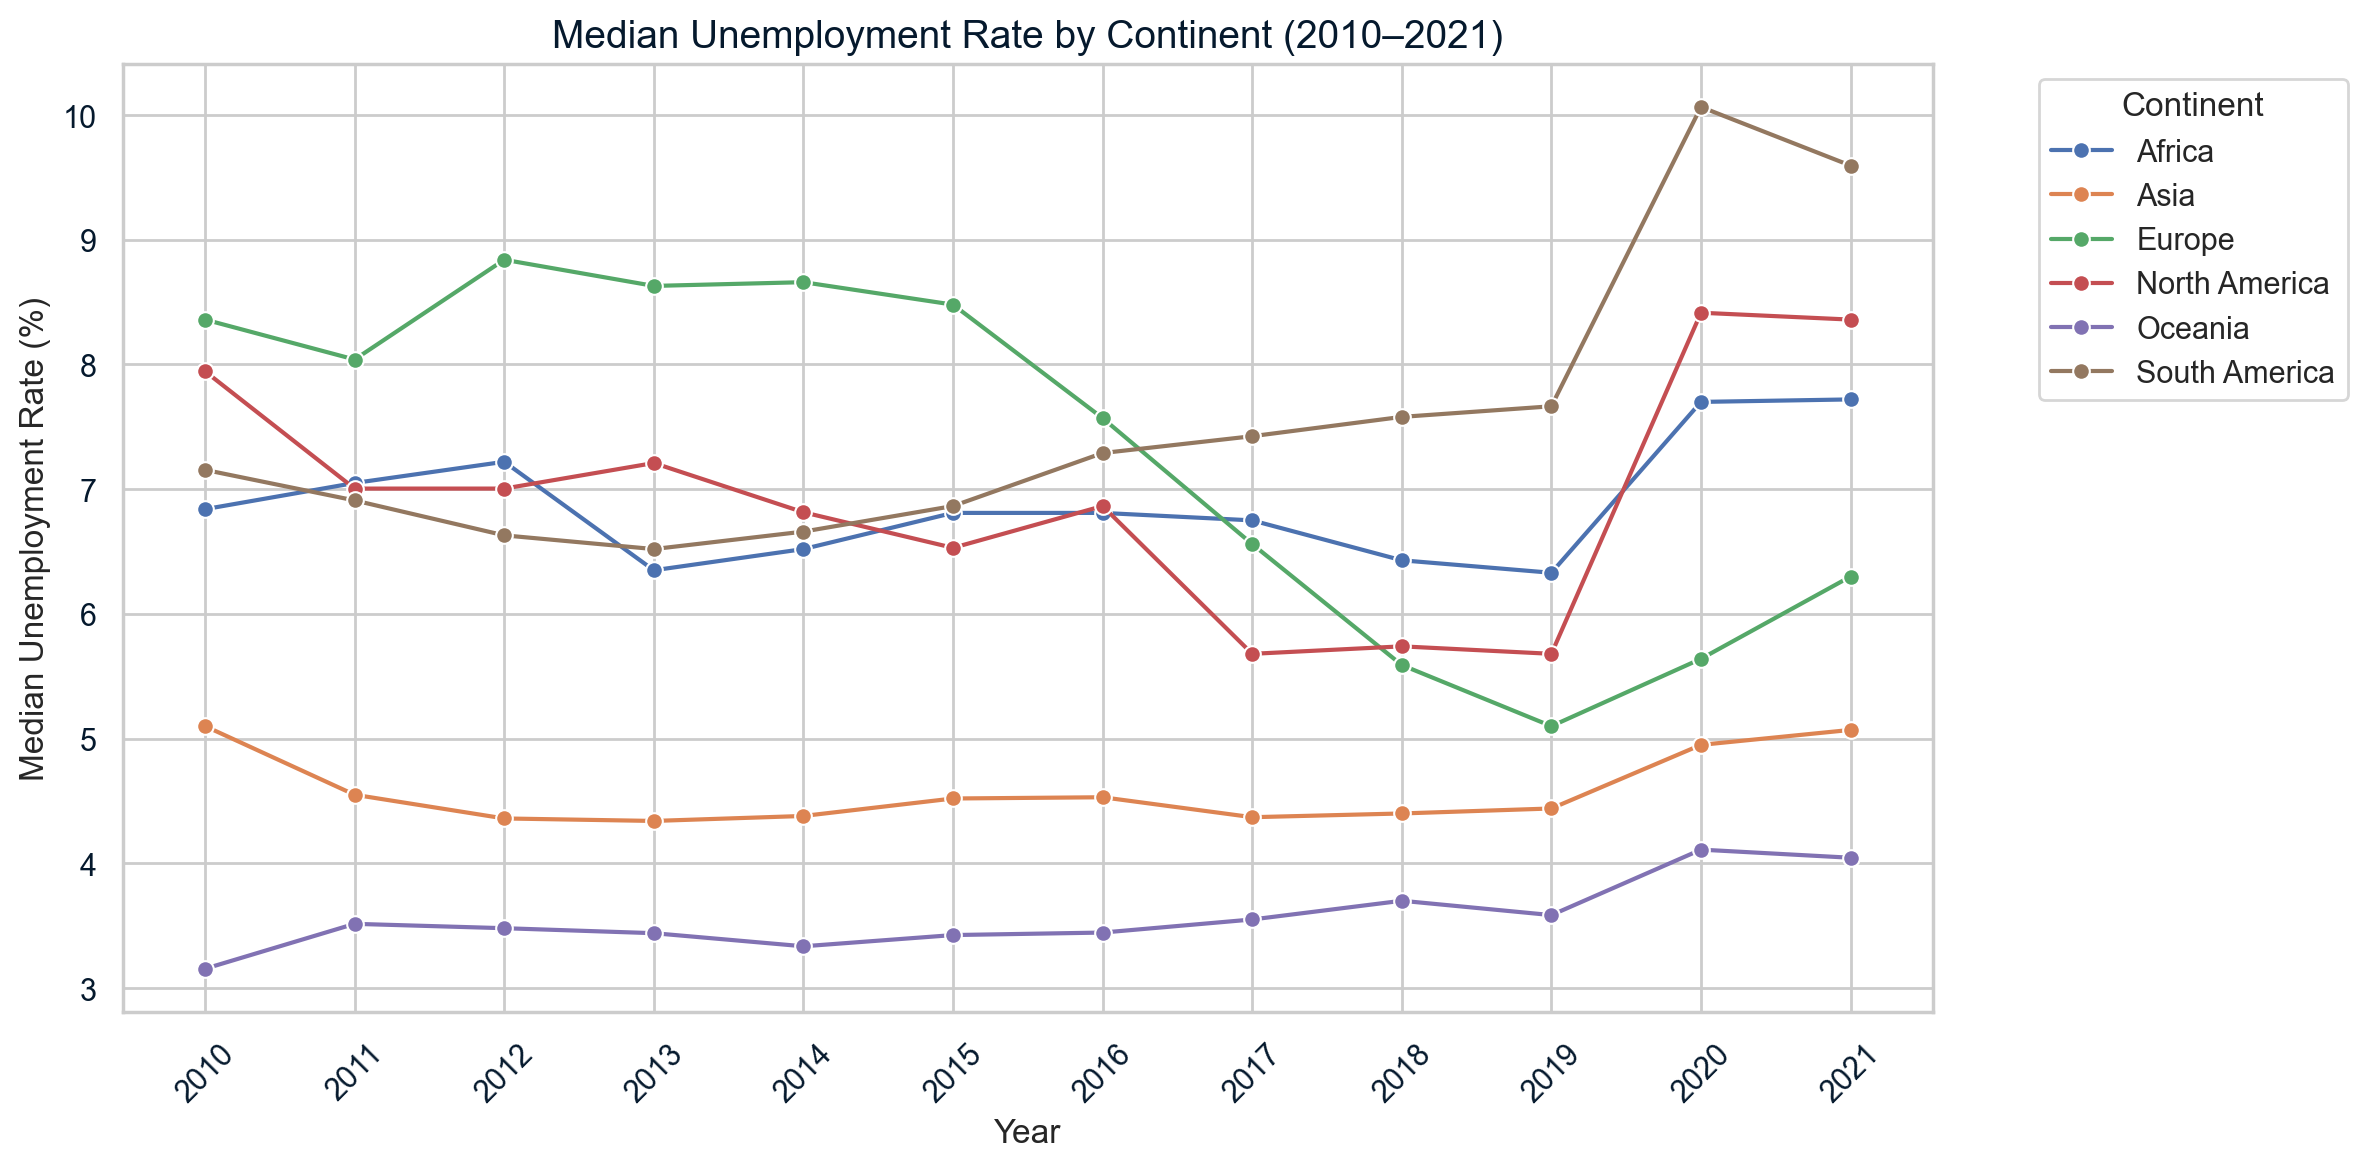

In [20]:
# Step 1: Melt the DataFrame to long format
df_melted = df.melt(
    id_vars=["country_name", "continent"],
    value_vars=[str(year) for year in range(2010, 2022)],
    var_name="year",
    value_name="unemployment_rate"
)

# Step 2: Calculate median unemployment rate by continent and year
median_df = df_melted.groupby(['continent', 'year'])['unemployment_rate'].median().reset_index()

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_df, x="year", y="unemployment_rate", hue="continent", marker="o")

# Customize the plot
plt.title("Median Unemployment Rate by Continent (2010–2021)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Median Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

[Why Need to Reset index](https://github.com/TasneemWorld/DataCamp/blob/main/Associate%20Data%20Scientist/EDA/why%20need%20to%20select%20index.pdf)

## Data summarization 

We can explore the characteristics of subsets of data further with the help of the `dot-groupby` function, which groups data by a given category, allowing the user to chain an aggregating function like dot-mean or dot-count to describe the data within each group.

The dot-agg function, short for aggregate, allows us to apply aggregating functions. By default, it aggregates data across all rows in a given column and is typically used when we want to apply more than one function. Here, we apply dot-agg to the books DataFrame and pass a list of aggregating functions to apply: dot-mean and dot-std. Our code returns a DataFrame of aggregated results, and dot-agg applies these functions only to numeric columns; the rating and year columns in the books DataFrame.

In [21]:
# Print the mean and standard deviation of rates by year
print(df.select_dtypes(include='number').agg(["mean", "std"]))

          2010      2011      2012  ...      2019      2020      2021
mean  8.409286  8.315440  8.317967  ...  7.243736  8.420934  8.390879
std   6.248887  6.266795  6.367270  ...  5.696573  6.040915  6.067192

[2 rows x 12 columns]


In [22]:
year_columns = [str(year) for year in range(2010, 2022)]
print(df.groupby("continent")[year_columns].agg(["mean", "std"])) #importent

                    2010                 2011  ...      2020       2021          
                    mean       std       mean  ...       std       mean       std
continent                                      ...                               
Africa          9.343585  7.411259   9.369245  ...  7.928166  10.473585  8.131636
Asia            6.240638  5.146175   5.942128  ...  5.699609   6.906170  5.414745
Europe         11.008205  6.392063  10.947949  ...  4.071218   7.414872  3.947825
North America   8.663333  5.115805   8.563333  ...  4.963045   9.155000  5.076482
Oceania         3.622500  2.054721   3.647500  ...  2.617490   4.280000  2.671522
South America   6.870833  2.807058   6.518333  ...  3.411263   9.924167  3.611624

[6 rows x 24 columns]


We can even use a dictionary to specify which aggregation functions to apply to which columns. The keys in the dictionary are the columns to apply the aggregation, and each value is a list of the specific aggregating functions to apply to that column.

In [27]:
print(df.agg({"2021":["mean", "std"], "2021":["median"]}))

         2021
median  6.425


In [28]:
print(df.agg({"2021":["mean", "std", "median"]}))

            2021
mean    8.390879
std     6.067192
median  6.425000


In [30]:
print(df.agg({"2021":["mean", "std"], "2011":["median"]}))

            2021   2011
mean    8.390879    NaN
std     6.067192    NaN
median       NaN  6.805


Crate a column `mean_rate_2021` and `std_rate_2021`

In [25]:
continent_summary = df.groupby("continent").agg(
    mean_rate_2021=("2021", "mean"),
    std_rate_2021=("2021", "std")
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


We can display similar information visually using a barplot. In Seaborn, bar plots will automatically calculate the mean of a quantitative variable like `year` across grouped categorical data, such as the `continent` category we've been looking at. In Seaborn, bar plots also show a 95% confidence interval for the mean as a vertical line on the top of each bar.

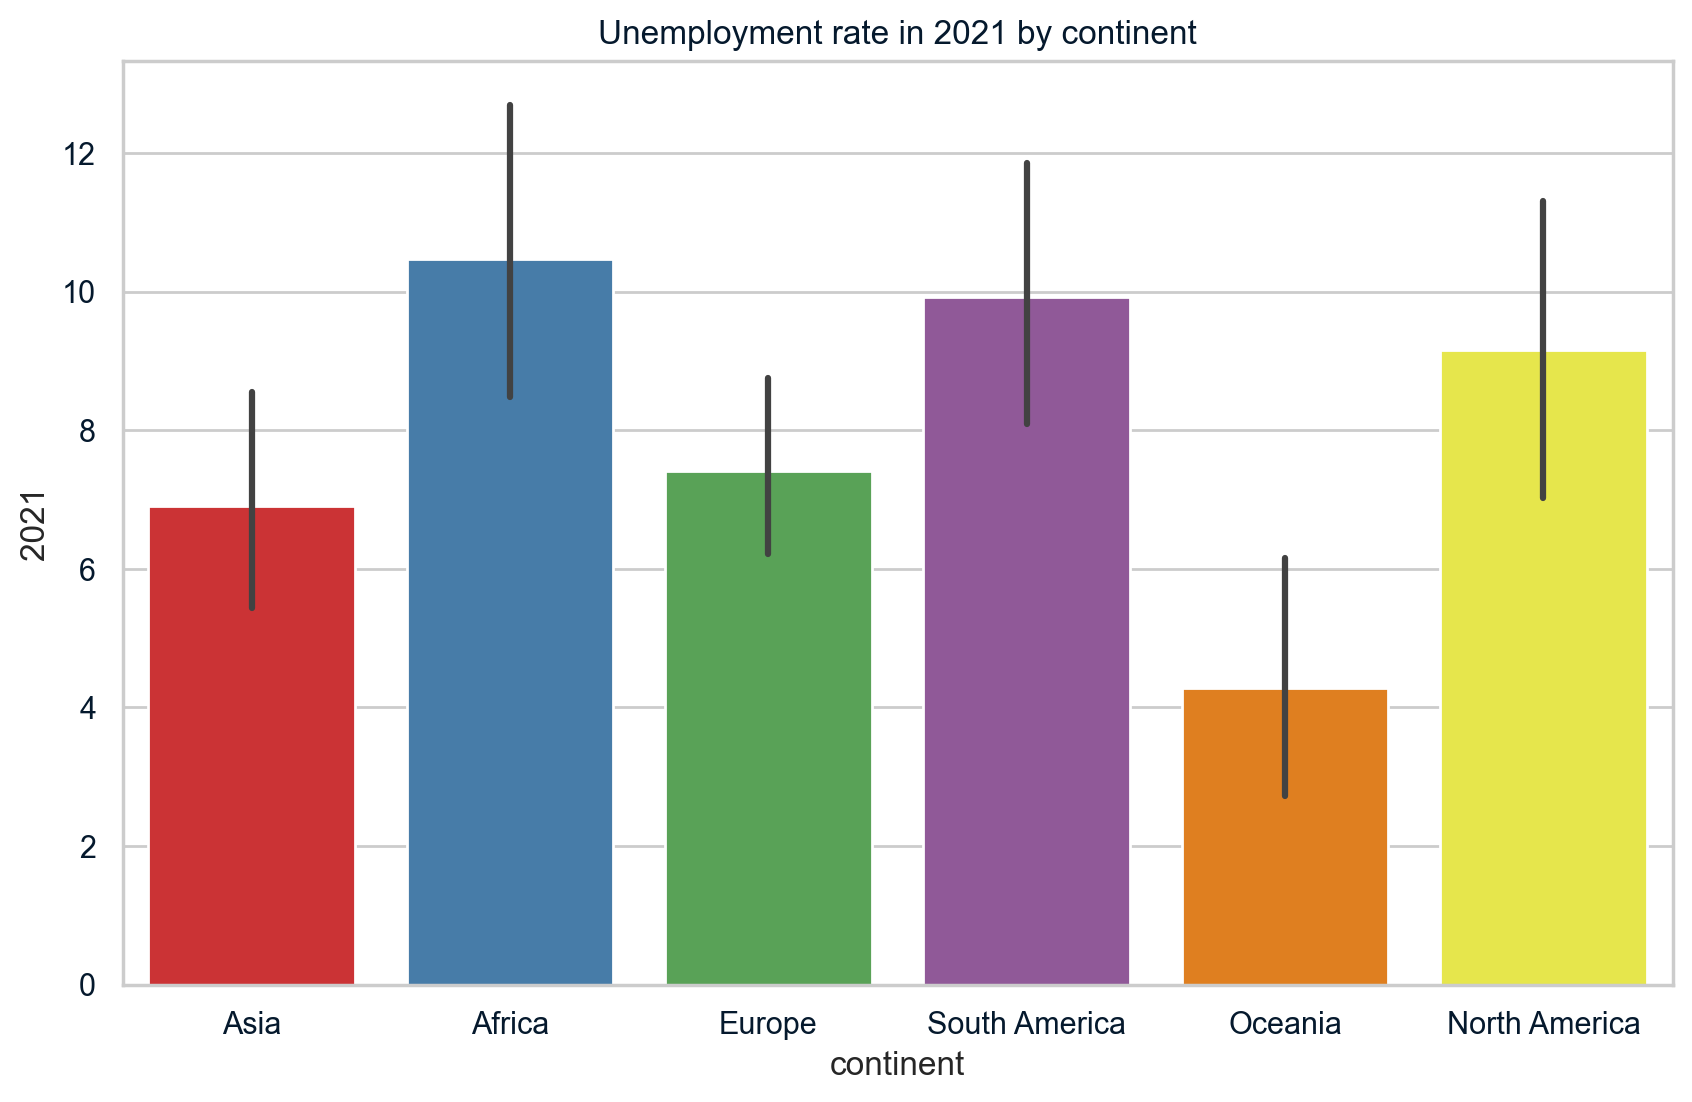

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x="continent", y="2021", data=df, palette="Set1")
plt.title("Unemployment rate in 2021 by continent")
plt.show()